- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited

_________________________________________________________________

# AIML Module Project - Unsupervised learning - Project 2 - Part II
_________________________________________________________________

### Assessment [ Total Score: 5 points ]

Please refer to the problem statement for questions and descriptions

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Scoring mechanism for moderators:

    " High quality and stritct assessment will enable our learners to achieve a score that they actually deserve and provide them a motivation to improvise for future. Both ways we are enabling the learners with high quality assessment and learnings. "


You will find the rubrics divided into 3 parts:
    
    -> Direct points [DP] : 
        1. These points tests the required bare minimum working knowledge on AIML for the learner. 
        2. The output obtained will be fixed and cannot vary. 
        3. Please award full points if the submission is similar to the sample solution
        
        
    -> Generic points [GP] : 
        1. These points tests the analytical thinking capacity of the learner. 
        2. These points highlight the thought and time invested by the learner on the project.
        3. The output obtained will vary. 
        4. Please award partial points only if the submissions are relevant, logical, analytical and innovative.
        
        
    -> Deduct 5 points from the total socre if any two or more of the below pointers not followed:
        1. ”.html” and ".ipynb" files should be an exact match.
        2. Pre-run codes with all outputs intact.
        3. Error free & machine independent i.e. run on any machine without adding any extra code.
        4. Well commented for clarity on code designed, assumptions made, approach taken, insights found and results obtained.

In [2]:
import pandas as pd

DB=pd.read_csv('batting_bowling_ipl_bat.csv')
DB=DB.dropna()
DB.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


### 1. EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods. [DP - 2 Points ]

- Award full points if atleast 5 good plots with insights dsiplayed

### Build a data driven model to rank all the players in the dataset using all or the most important performance features. [GP - 3 Points]

- Award full points depending on the logic used to generate ranks is by using eigen values and vectors.
- Else award partial points as per the efforts and relevance

[0.70911996 0.84696562 0.91563695 0.96988153 0.99718777 1.        ]


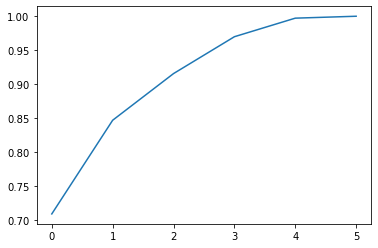

In [3]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
DB_S = scaler.fit_transform(DB.drop(columns = 'Name'))

# Finding: Optimal PCs
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA().fit(DB_S)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
print(np.cumsum(pca.explained_variance_ratio_))

In [5]:
# covariance matrix
import scipy.linalg as la
cv=np.cov(DB_S.T)

print("covariance matrix:\n\n",cv)

covariance matrix:

 [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [6]:
#eigen values and vectors
import scipy.linalg as la
eig_vals,eig_vecs=np.linalg.eig(cv)    # Eigen values and Eigen vectors
print("\nEigen Values: \n",eig_vals,"\n")    # print eigen values
print("Eigen Vectors: \n",eig_vecs)    # print eigen vectors


Eigen Values: 
 [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443] 

Eigen Vectors: 
 [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]


In [7]:
# PC selection

def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

a=zerolistmaker(len(eig_vals))

eig_tot=sum(eig_vals)    # sum eigen values

print("Variance captured by PCs")

for i in range(0,len(eig_vals)):     
     a[i]=round(((100*eig_vals[i]/eig_tot)+a[i-1]),1)
     print("\tPC",i+1,":",a[i],"%")             # loop to derive varience capture by PC
    
#cum_var = np.cumsum(a)    # cumulative variance
#print("\n cumulative variance: \n\t",cum_var)    # print cumulative variance

Variance captured by PCs
	PC 1 : 70.9 %
	PC 2 : 84.7 %
	PC 3 : 85.0 %
	PC 4 : 87.7 %
	PC 5 : 94.6 %
	PC 6 : 100.0 %


In [8]:
# Calculate scores

import math

def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

b=zerolistmaker(len(eig_vals))
b1=zerolistmaker(len(eig_vals))
b2=zerolistmaker(len(eig_vals))
b3=zerolistmaker(len(eig_vals))

EV1=eig_vecs[:,0]
for i in range(0,len(eig_vals)):
    b1[i]=EV1[i]*math.sqrt(eig_vals[i])

    
EV2=eig_vecs[:,1]
for i in range(0,len(eig_vals)):
    b2[i]=EV2[i]*math.sqrt(eig_vals[i])

    
EV3=eig_vecs[:,2]
for i in range(0,len(eig_vals)):
    b3[i]=EV3[i]*math.sqrt(eig_vals[i])


for i in range(0,len(eig_vals)):
    b[i]=b1[i]+b2[i]+b3[i]


    
print("PCA Loadings:",b)

z = np.array(b)
print(z)

DB['Scores'] = abs(np.matmul(DB_S, z.T))

DB

PCA Loadings: [-2.9652044745108648, -0.005686801130866011, 0.0412998302514581, -0.11973271299520932, 0.07716968032567786, -0.4986925208242217]
[-2.96520447 -0.0056868   0.04129983 -0.11973271  0.07716968 -0.49869252]


,Name,Runs,Ave,SR,Fours,Sixes,HF,Scores
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0,11.746621
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0,8.686311
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0,6.472982
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0,6.065188
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0,7.960898
...,...,...,...,...,...,...,...,...
171,Z Khan,12.0,6.00,70.58,1.0,0.0,0.0,4.308117
173,WD Parnell,19.0,4.75,70.37,2.0,0.0,0.0,4.167350
175,PC Valthaty,30.0,5.00,58.82,4.0,0.0,0.0,3.922369
177,RP Singh,6.0,3.00,50.00,0.0,0.0,0.0,4.395088


<BarContainer object of 20 artists>

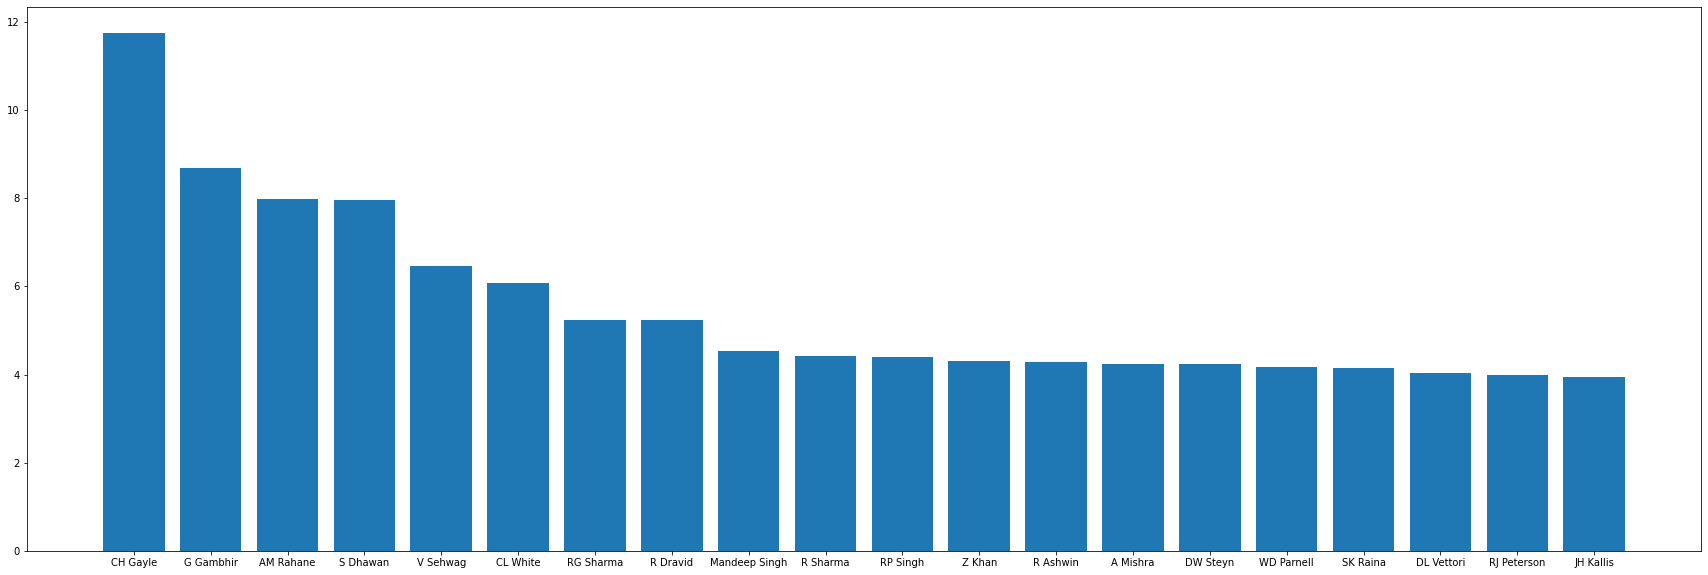

In [9]:
# Top 20 players

DBsorted=DB.sort_values(by=['Scores'],ascending=False)
plt.figure(figsize=(30 ,10))
Top10=DBsorted.head(20)
plt.bar(Top10['Name'],Top10['Scores'])

                                        END


_________________________________________________________________

©Great Learning. Proprietary content. All Rights Reserved. Unauthorised use or distribution prohibited
________________________________________________________